In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Keller-Segel Model for our system: 
## $ \frac{\partial n}{\partial t} = D_{n} \nabla^2 n - \chi \nabla{n \nabla c}$ 
## $ \frac{\partial c}{\partial t} = D_{c} \nabla^2 c - \gamma n $ 
#### where 
#### $n$ is the cell density,
#### $c$ is the concentration of chemical species, 
#### $D_n$ and $D_c$ are the diffusion coefficients of cells and chemical species respectively, 
#### $\chi$ is the chemotactic sensitivity, 
#### $\gamma$ is the rate of consumption of chemical species. 
#### No production of chemical species is assumed

### The numerical simulation is performed in 1 dimension. Zero flux boundary condition is used

In [8]:
## Define geometry

L = 10.0  # Domain size
Nx = 100  # Number of spatial points
Dx = L / Nx  # Spatial resolution
x = np.linspace(0, L, Nx) # Spatial grid

In [14]:
## Define time parameters
Dt = 0.01  # Time step
T = 5.0  # Total simulation time

## Linear concentration profile of chemical species

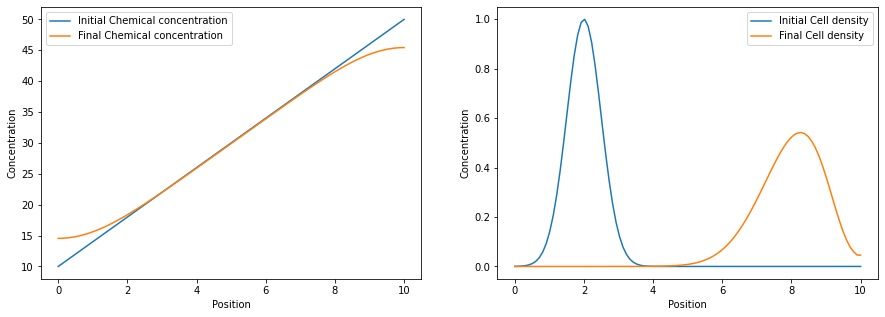

In [17]:
D_n = 0.1  # Cell diffusion coefficient

D_c = 0.2  # Chemical diffusion coefficient
chi = 0.3  # Chemotactic sensitivity
gamma = 0.1

#parameters of the Gaussian function
#G_center = 8
#G_var = 2
#c = np.exp(-((x - G_center)**2) / (0.5*G_var))  # Initial cell density (Gaussian)

#define linear chemical gradient
c = x*4 + 10

#plt.plot(x,n)
#plt.show()
#c = np.zeros_like(x)  # Initial chemical concentration
G_center = 2
n = np.exp(-((x - G_center)**2) / 0.5)  # Initial cell density (Gaussian)
#plt.plot(x,c)
#plt.show()
#save initial concentrations
n0 = n
c0 = c

# Time-stepping
time_steps = int(T / Dt)
for t in range(time_steps):
    # Compute gradients
    dn_dx = np.gradient(n, Dx)
    d2n_dx2 = np.gradient(dn_dx, Dx)
    dc_dx = np.gradient(c, Dx)
    d2c_dx2 = np.gradient(dc_dx, Dx)
    
    # Update cell density (n)
    chemotaxis_term = -chi * np.gradient(n * dc_dx, Dx)
    n = n + Dt * (D_n * d2n_dx2 + chemotaxis_term)
    
    # Update chemical concentration (c)
    #c = c + Dt * (D_c * d2c_dx2 + n - 0.1*c)  # Source: cells, decay: 0.1*c
    c = c + Dt * (D_c * d2c_dx2 + 0 - gamma*n)  # no production, and decay linearly proportional to cell density
    
    # Apply boundary conditions (e.g., zero flux)
    n[0], n[-1] = n[1], n[-2]
    c[0], c[-1] = c[1], c[-2]


#plot results
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(x, c0, label="Initial Chemical concentration")
axs[0].plot(x, c, label="Final Chemical concentration")
axs[0].set_xlabel("Position")
axs[0].set_ylabel("Concentration")
axs[0].legend();

axs[1].plot(x, n0, label="Initial Cell density")
axs[1].plot(x, n, label="Final Cell density")
axs[1].set_xlabel("Position")
axs[1].set_ylabel("Concentration")
axs[1].legend();